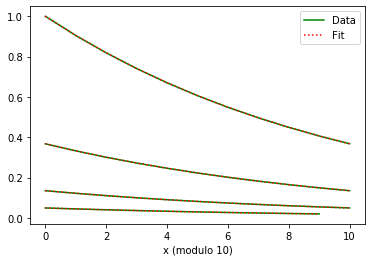

In [5]:
import sys
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#generate points
x=np.arange(40)
y=np.exp(-x/10)

#fit to data
def fit_func(x, t):
    return np.exp(-x/t)
par, pcov = optimize.curve_fit(f=fit_func, xdata=x, ydata=y)



#set initial the rolling minimum and section count
x_min=x.min()
x_max=x.max()
x_mod = 10 # folding factor  
left=x_min 
i_section = 0


fig, ax = plt.subplots()
#loop over of the modulo folds
while left < x_max:
    right=left + x_mod
    mod_filter = (x >= left) & (x<= right) # boolean mask
    # plot for that section and label only the 1st
    ax.plot(x[mod_filter]-left, y[mod_filter], c='g', label="Data" if i_section==0 else '');
    ax.plot(x[mod_filter]-left, fit_func(x[mod_filter], par), c='r', linestyle=":", label="Fit" if i_section==0 else '');
    left=right # get the next fold 
    i_section += 1

ax.set_xlabel("x (modulo 10)")
ax.legend()
plt.savefig("fig/mod.png", dpi=300)

